In [15]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [16]:
testfolder = r'..\test'
#testfolder=r'G:\My Drive\libraries\python\userKov3\pySurf\test' #for economy during development, hard coded path.
#testfolder os.path.dirname(__file__) #to set it as relative to this file path.

import os
#from format_reader import read_sur
import numpy as np
import matplotlib.pyplot as plt
from pySurf.readers.read_sur_files import readsur

#from test_readers import testfolder
from pySurf.data2D import plot_data, read_data
from pySurf.readers.format_reader import points_reader,csvZygo_reader  #
from pySurf.readers.format_reader import sur_reader
import os
import sys

In [17]:
#ported to/from notebook

def test_read_fits(file, raw = False):

    """read a sur file using read_sur_files, that is expected to return a structure
     res.points, .xAxis, .yAxis"""

    res = readsur(file,raw = raw) #in readsur the default is False.
    data,x,y = res.points,res.xAxis,res.yAxis
    del res.points
    del res.xAxis
    del res.yAxis
    header=res #stripped of all data information

    return (data,x,y),header

Running in path: C:\Users\kovor\Documents\python\pyXTel\pyxsurf\pySurf\readers
File path: C:\Users\kovor\Anaconda3\lib\site-packages\ipykernel_launcher.py
reading data 05_xysurf_pp_Intensity.sur


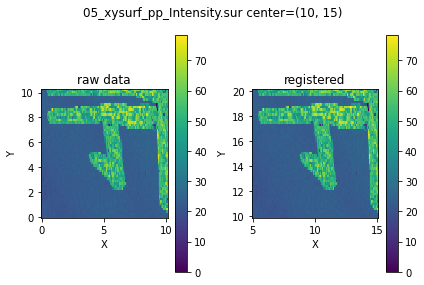

reading data 05_xysurf_pp_Intensity.txt


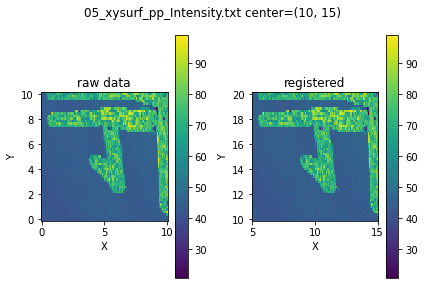

reading data 171212_PCO2_Zygo_data.asc


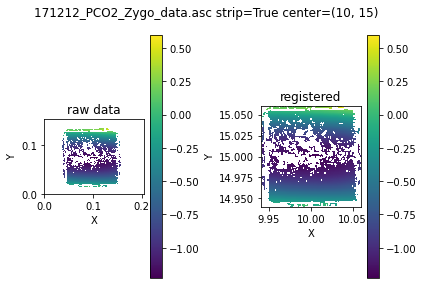

reading data 171212_PCO2_Zygo_data.asc


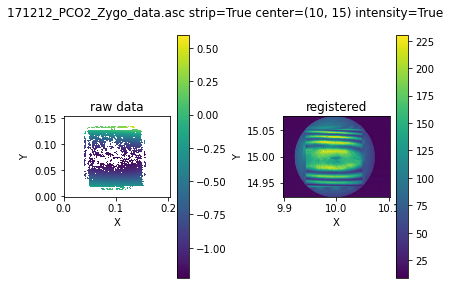

In [18]:
#if __name__=='__main__':

# da _instrument_reader: li' va rimossa la registrazione.

"""It is based on a tentative generic function read_data accepting among arguments a specific reader.
    The function first calls the data reader, then applies the register_data function to address changes of scale etc.
    This works well, however read_data must filter the keywords for the reader and for the register and
    this is hard coded, that is neither too elegant or maintainable. Note however that with this structure it is
    possible to call the read_data procedure with specific parameters, for example in example below, the reader for
    Zygo cannot be called directly with intensity keyword set to True without making a specific case from the other readers,
    while this can be done using read_data. """

from pySurf.readers.test_readers import test_readers

pwd = '.' #os.path.dirname(os.path.realpath(sys.argv[0]))

tests=[[sur_reader,
os.path.join(pwd,testfolder,r'input_data\profilometer\04_test_directions\05_xysurf_pp_Intensity.sur')
,{'center':(10,15)}],[points_reader,
os.path.join(pwd,testfolder,r'input_data\profilometer\04_test_directions\05_xysurf_pp_Intensity.txt')
# questo fallisce, perche' delimiter e' " "  e non e' possibile passare l'argomento al reader
#os.path.join(testfolder,r'input_data\exemplar_data\scratch\110x110_50x250_100Hz_xyscan_Height_transformed_4in_deltaR.dat')
,{'center':(10,15)}],
[csvZygo_reader,
os.path.join(pwd,testfolder,r'input_data\zygo_data\171212_PCO2_Zygo_data.asc')
,{'strip':True,'center':(10,15)}],
[csvZygo_reader,
os.path.join(pwd,testfolder,r'input_data\zygo_data\171212_PCO2_Zygo_data.asc')
,{'strip':True,'center':(10,15),'intensity':True}]]


test_readers(tests)
